# Statistical Power Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.power import TTestIndPower
import math

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
eff_sizes = []
samp_sizes = []

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [3]:
analysis = TTestIndPower()
s = analysis.solve_power(effect_size=0.5, nobs1=None, alpha=0.05, power=0.8)
s

63.76561177540974

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [4]:
e = analysis.solve_power(effect_size=None, nobs1=100, alpha=0.05, power=0.8)
e

0.3981391173911278

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

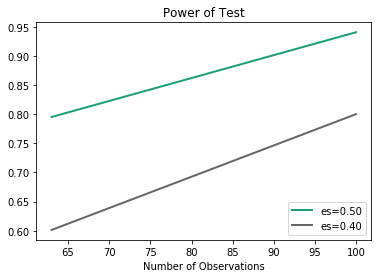

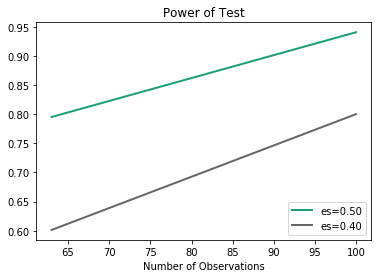

In [23]:
effect_sizes = np.array([0.5, e])
sample_sizes = np.array([int(s), 100])
analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes)

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [6]:
p = analysis.solve_power(effect_size=0.4, nobs1=100, alpha=0.05, power=None)
p

0.8036474965430749

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

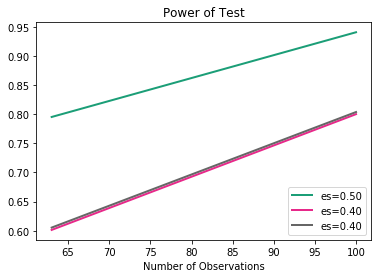

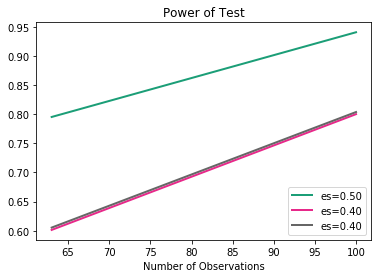

In [7]:
effect_sizes = np.append(effect_sizes, [0.4])
sample_sizes = np.append(sample_sizes, [100])
analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes)

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [8]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'

In [9]:
titanic = pd.read_csv(data_url)
titanic_drop = titanic.dropna()
titanic_drop.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Summarize the number of observations and average age per group.

In [10]:
titanic_drop.shape

(183, 12)

In [11]:
means = titanic.groupby('Survived').mean()

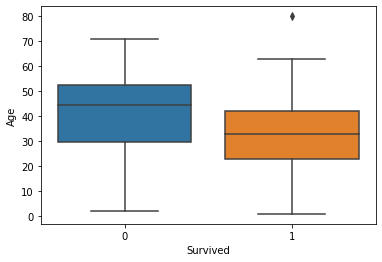

In [12]:
sns.boxplot(x='Survived', y='Age', data=titanic_drop)
plt.show()

### Perform t-test.

In [13]:
lived = titanic_drop[titanic_drop['Survived'] == 1]
died = titanic_drop[titanic_drop['Survived'] == 0]
t, p = stats.ttest_ind(lived['Age'], died['Age'])

In [14]:
t

-3.53435125095576

In [15]:
p

0.0005189503307881672

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [16]:
n_obs1 = lived.size
n_obs2 = died.size
var1 = lived['Age'].var()
var2 = died['Age'].var()

pooled_stdev = math.sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))

effect_size = (lived['Age'].mean() - died['Age'].mean() ) / pooled_stdev
effect_size

-0.5564988227453633

**Use the effect size you calculated to compute the statistical power of this test.**

In [17]:
analysis.solve_power(effect_size=effect_size, nobs1=titanic_drop.size, 
                         alpha=0.05, power=None)

1.0

**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [18]:
analysis.solve_power(effect_size=None, nobs1=titanic_drop.size, 
                         alpha=0.05, power=0.8)

0.08456675080891862

**Determine the sample size necessary to get a statistical power of 0.8.**

In [19]:
analysis.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8)

51.66648379706815

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

[]

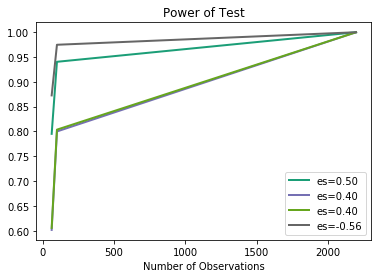

In [21]:
effect_sizes = np.append(effect_sizes, [effect_size])
sample_sizes = np.append(sample_sizes, [titanic_drop.size])
analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes)
plt.plot()